# 7. Modern Convolutional Neural Networks

### 7.1 Deep Convolutional Neural Networks (AlexNet)

Although convolutional neural networks were well known in the computer vision and machine learning communities following the introduction of LeNet, they did not immediately dominate the field. Although LeNet achieved good results on early small datasets, the performance and feasability of training convolutional neural nets on larger, more realistic datasets had yet to be established. In fact, for much of the intervening time between the early 1990s and the watershed results of 2012, neural networks were often surpassed by other machine learning methods, such as SVMs.

For computer vision, this comparison is perhaps not fair. That is although the inputs to convolutional networks consist of raw of lightly-processed (e.g., by centering) pixel values, **practitioners would never feed raw pixels into traditional models.** Instead, typical computer vision pipelines consisted of manually engineering feature extraction pipelines. **Rather than learn the features, the features were *crafted***. **Most of the progress came from having more clever ideas for features, and the learning algorithm was often relegated to an afterthought.** 

Although some neural nets accelerators were available in the 1990s, they were not yet sufficiently powerful to make deep multichannel, multilayer convolutional neural nets with a large number of parameters. Moreover, datasets were still relatively small. Added to these obstacles, key tricks for training neural networks including parameter initialization heuristics, clever variants of SGD, non-squashing activation functions, and effective regularization techniques were still missing.

Thus, rather than end-to-end (pixel to classification) systems, classical pipelines looked more like this:

- 1) Obtain an interesting dataset
- 2) Preprocess the dataset with hand-crafted features based on some knowledge of optics, geometry, other analytic tools, and occasionally on the serendipitous discoveries of lucky graduate students.
- 3) Feed the data through a standard set of feature extractors such as *SIFT*, the Scale-Invariant Feature Transform, or *SURF*, the Speeded-Up Robust Features, or any number of hand-tuned pipelines.
- 4) Dump the resulting representations into your favorite classifier, likely a linear model or kernel method, to learn a classifier.

If you spoke to machine learning researchers, they believed that ML was both important and beautiful. Elegant theories proved the properties of various classifiers. The field of machine learning was thriving, rigorous and eminently useful. However, if you spoke to a computer vision researcher, you'd hear a very different story. **The dirty truth of image recognition, they'd tell you, is that FEATURES, not learning algorithms, drove progress. Computer vision researchers justifiably believed that a slightly bigger or cleaner dataset or a slightly improved feature-extraction pipeline mattered far more to the final accuracy than any learning algorithm**.

#### 7.1.1 Learning Feature Representation

Another way to cast the state of affairs is that the most important part of the pipeline was the rep- resentation. And up until 2012 the representation was calculated mechanically. In fact, engineer- ing a new set of feature functions, improving results, and writing up the method was a prominent genre of paper. SIFT, SURF, HOG, Bags of visual words and similar feature extractors ruled the roost.

Another group of researchers, including Yann LeCun, Geoff Hinton, Yoshua Bengio, Andrew Ng, Shun-ichi Amari, and Juergen Schmidhuber, had different plans. **They believed that features themselves ought to be learned. Moreover, they believed that to be reasonably complex, the features ought to be hierarchically composed with multiple jointly learned layers, each with learnable parameters.** In the case of an image, the lowest layers might come to detect edges, colors, and textures. Indeed, (Krizhevsky et al., 2012) proposed a new variant of a convolutional neural network which achieved excellent performance in the ImageNet challenge.

Interestingly in the lowest layers of the network, the model learned feature extractors that resembled some traditional filters.


Higher layers in the network might build upon these representations to represent larger structures, like eyes, noses, blades of grass, etc. Even higher layers might represent whole objects like people, airplanes, dogs, or frisbees. Ultimately, the final hidden state learns a compact representation of the image that summarizes its contents such that data belonging to different categories be separated easily.

While the ultimate breakthrough for many-layered convolutional networks came in 2012, a core group of researchers had dedicated themselves to this idea, attempting to learn hierarchical representations of visual data for many years. The ultimate breakthrough in 2012 can be attributed to two key factors.

##### Missing Ingredient - Data
Deep models with many layers require large amounts of data in order to enter the regime where they significantly outperform traditional methods based on convex optimizations (e.g., linear and kernel methods). However, given the limited storage capacity of computers, the relative expense of sensors, and the comparatively tighter research budgets in the 1990s, most research relied on tiny datasets. Numerous papers addressed the UCI collection of datasets, many of which contained only hundreds or (a few) thousands of images captured in unnatural settings with low resolution.

In 2009, the ImageNet dataset was released, challenging researchers to learn models from 1 million examples, 1,000 each from 1,000 distinct categories of objects. The researchers, led by Fei-Fei Li, who introduced this dataset leveraged Google Image Search to prefilter large candidate sets for each category and employed the Amazon Mechanical Turk crowdsourcing pipeline to confirm for each image whether it belonged to the associated category. This scale was unprecedented. The associated competition, dubbed the ImageNet Challenge pushed computer vision and machine learning research forward, challenging researchers to identify which models performed best at a greater scale than academics had previously considered.

##### Missing Ingredient - Hardware

Deep learning models are voracious consumers of compute cycles. Training can take hundreds of epochs, and each iteration requires passing data through many layers of computationally- expensive linear algebra operations. This is one of the main reasons why in the 90s and early 2000s, simple algorithms based on the more-efficiently optimized convex objectives were preferred.

Graphical processing units (GPUs) proved to be a game changer in make deep learning feasible. These chips had long been developed for accelerating graphics processing to benefit computer games. In particular, they were optimized for high throughput 4x4 matrix-vector products, which are needed for many computer graphics tasks. Fortunately, this math is strikingly similar to that required to calculate convolutional layers. Around that time, NVIDIA and ATI had begun opti- mizing GPUs for general compute operations, going as far as to market them as General Purpose GPUs (GPGPU).

To provide some intuition, consider the cores of a modern microprocessor (CPU). Each of the cores is fairly powerful running at a high clock frequency and sporting large caches (up to several MB of L3). Each core is well-suited to executing a wide range of instructions, with branch predictors, a deep pipeline, and other bells and whistles that enable it to run a large variety of programs. This apparent strength, however, is also its Achilles heel: general purpose cores are very expensive to build. They require lots of chip area, a sophisticated support structure (memory interfaces, caching logic between cores, high speed interconnects, etc.), and they are comparatively bad at any single task. Modern laptops have up to 4 cores, and even high end servers rarely exceed 64 cores, simply because it is not cost effective.

By comparison, GPUs consist of 100-1000 small processing elements (the details differ somewhat between NVIDIA, ATI, ARM and other chip vendors), often grouped into larger groups (NVIDIA calls them warps). While each core is relatively weak, sometimes even running at sub-1GHz clock frequency, it is the total number of such cores that makes GPUs orders of magnitude faster than CPUs. For instance, NVIDIAʼs latest Volta generation offers up to 120 TFlops per chip for specialized instructions (and up to 24 TFlops for more general purpose ones), while floating point performance of CPUs has not exceeded 1 TFlop to date. The reason for why this is possible is actually quite simple: first, power consumption tends to grow quadratically with clock frequency. Hence, for the power budget of a CPU core that runs 4x faster (a typical number), you can use 16 GPU cores at 1/4 the speed, which yields 16 x 1/4 = 4x the performance. Furthermore, GPU cores are much simpler (in fact, for a long time they werenʼt even able to execute general purpose code), which makes them more energy efficient. Last, many operations in deep learning require high memory bandwidth. Again, GPUs shine here with buses that are at least 10x as wide as many CPUs.

Back to 2012. A major breakthrough came when Alex Krizhevsky and Ilya Sutskever implemented a deep convolutional neural network that could run on GPU hardware. They realized that the computational bottlenecks in CNNs (convolutions and matrix multiplications) are all operations that could be parallelized in hardware. Using two NVIDIA GTX 580s with 3GB of memory, they implemented fast convolutions. The code cuda-convnet was good enough that for several years it was the industry standard and powered the first couple years of the deep learning boom.

#### 7.1.2 AlexNet
AlexNet was introduced in 2012, named after Alex Krizhevsky, the first author of the breakthrough ImageNet classification paper (Krizhevsky et al., 2012). AlexNet, which employed an **8-layer convolutional neural network**, won the ImageNet Large Scale Visual Recognition Challenge 2012 by a phenomenally large margin. This network proved, for the first time, that the features obtained by learning can transcend manually-design features, breaking the previous paradigm in computer vision. The architectures of AlexNet and LeNet are very similar, as Fig. 7.1.2 illustrates. Note that we provide a slightly streamlined version of AlexNet removing some of the design quirks that were needed in 2012 to make the model fit on two small GPUs.

The design philosophies of AlexNet and LeNet are very similar, but there are also significant differences. First, AlexNet is much deeper than the comparatively small LeNet5. AlexNet consists of eight layers: five convolutional layers, two fully-connected layers, and one fully-connected output layer. Second, AlexNet used ReLU instead of the sigmoid as its activation function. Let's delve into the details below.

##### Architecture

In AlexNetʼs first layer, the convolution window shape is 11 × 11. Since most images in ImageNet are more than ten times higher and wider than the MNIST images, objects in ImageNet data tend to occupy more pixels. Consequently, a larger convolution window is needed to capture the object. The convolution window shape in the second layer is reduced to 5×5, followed by 3×3. In addition, after the first, second, and fifth convolutional layers, the network adds maximum pooling layers with a window shape of 3 × 3 and a stride of 2. Moreover, AlexNet has ten times more convolution channels than LeNet.


After the last convolutional layer are two fully-connected layers with 4096 outputs. These two huge fully-connected layers produce model parameters of nearly 1 GB. Due to the limited memory in early GPUs, the original AlexNet used a dual data stream design, so that each of their two GPUs could be responsible for storing and computing only its half of the model. Fortunately, GPU mem- ory is comparatively abundant now, so we rarely need to break up models across GPUs these days (our version of the AlexNet model deviates from the original paper in this aspect).

##### Activation Functions


Second, AlexNet changed the sigmoid activation function to a simpler ReLU activation function. On the one hand, the computation of the ReLU activation function is simpler. For example, it does not have the exponentiation operation found in the sigmoid activation function. On the other hand, the ReLU activation function makes model training easier when using different parameter initialization methods. **This is because, when the output of the sigmoid activation function is very close to 0 or 1, the gradient of these regions is almost 0, so that back propagation cannot continue to update some of the model parameters**. In contrast, the gradient of the ReLU activation function in the positive interval is always 1. Therefore, if the model parameters are not properly initialized, the sigmoid function may obtain a gradient of almost 0 in the positive interval, so that the model cannot be effectively trained.

#### Capacity Control and Preprocessing

AlexNet controls the model complexity of the fully-connected layer by dropout (Section 4.6), while LeNet only uses weight decay. To augment the data even further, the training loop of AlexNet added a great deal of image augmentation, such as flipping, clipping, and color changes. This makes the model more robust and the larger sample size effectively reduces overfitting. We will discuss data augmentation in greater detail later.

In [1]:
import d2l
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn

npx.set_np()

In [21]:
net = nn.Sequential()
net.add(nn.Conv2D(96, kernel_size=(11,11), strides = 4, activation='relu'),
        nn.MaxPool2D(pool_size = (3,3), strides = 2),
        nn.Conv2D(256, kernel_size = (5,5), padding = 2, activation='relu'),
        nn.MaxPool2D(pool_size = (3,3), strides = 2),
        nn.Conv2D(384, kernel_size = (3,3), padding = 1, activation='relu'),
        nn.Conv2D(384, kernel_size = (3,3), padding = 1, activation='relu'),
        nn.Conv2D(256, kernel_size = (3,3), padding = 1, activation='relu'),
        nn.MaxPool2D(pool_size = (3,3), strides = 2),
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
        nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
        nn.Dense(10)) # We are using Fashion MNIST, so the number of classes is 10,
        # instead of 1000

In [22]:
X = np.random.uniform(size=(1, 1, 224, 224))
net.initialize()

for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv30 output shape:	 (1, 96, 54, 54)
pool18 output shape:	 (1, 96, 26, 26)
conv31 output shape:	 (1, 256, 26, 26)
pool19 output shape:	 (1, 256, 12, 12)
conv32 output shape:	 (1, 384, 12, 12)
conv33 output shape:	 (1, 384, 12, 12)
conv34 output shape:	 (1, 256, 12, 12)
pool20 output shape:	 (1, 256, 5, 5)
dense18 output shape:	 (1, 4096)
dropout12 output shape:	 (1, 4096)
dense19 output shape:	 (1, 4096)
dropout13 output shape:	 (1, 4096)
dense20 output shape:	 (1, 10)


#### 7.1.3 Reading the Dataset

Although AlexNet uses ImageNet in the paper, we use Fashion-MNIST here since training an ImageNet model to convergence could take hours or days even on a modern GPU. One of the problems with applying AlexNet directly on Fashion-MNIST is that our images **are lower resolution (28 x 28 pixels)** than ImageNet images. To make things work, we upsample them to 224 x 224 pixels (**generally not a smart practice, but we do it here to be faithful to the AlexNet architecture**). We perform this resizing with the resize argument in `load_data_fashion_mnist`.

In [23]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, 
                                                    resize=224)

#### 7.1.4 Training

Now, we can star training AlexNet. Compared to LeNet in the previous section, the main change here is the use of a smaller learning rate and much slower training **due to the deeper and wider network, the higher image resolution and the more costly convolutions**.

In [2]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, ctx = d2l.try_gpu()):
    net.initialize(force_reinit = True, ctx = ctx, init = init.Xavier())
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
    animator = d2l.Animator(xlabel = 'epoch', xlim = [0, num_epochs],
                           legend = ['train loss', 'train acc', 'test acc'])
    timer = d2l.Timer()
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        for i, (X,y) in enumerate(train_iter):
            timer.start()
            X, y = X.as_in_context(ctx), y.as_in_context(ctx)
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y)
            l.backward()
            trainer.step(X.shape[0])
            metric.add(l.sum(), d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_loss, train_acc = metric[0] / metric[2], metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i/ len(train_iter),
                            (train_loss, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print('loss %.3f, train acc %.3f, test acc %.3f' % (train_loss, 
                                                        train_acc, test_acc))
    print('%.1f examples / sec on %s' % (metric[2]*num_epochs/timer.sum(), ctx))

NameError: name 'evaluate_accuracy_gpu' is not defined

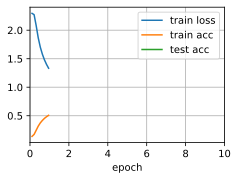

In [25]:
lr, num_epochs = 0.01, 10

train_ch6(net, train_iter, test_iter, num_epochs, lr)

## 7.2 Network Using Blocks (VGG)

While AlexNet proved that deep convolutional neural nets can achieve good results, it did not offer **a general template to guide researchers in designing new networks**. In the following sections introduce several heuristic concepts commonly used to design deep networks.


Progress in this field mirrors that in chip design where engineers went from placing transistors to logical elements to logic blocks. Similarly, the **design of neural network architectures had grown progressively more abstract, with researchers moving from thinking in terms of individual neurons to whole layers, and now to blocks, repeating patterns of layers.**

The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University. In their eponymously-named VGG network, It is easy to implement these repeated structures in code with any modern deep learning framework by using loops and subroutines.


#### 7.2.1 VGG Blocks

The basic building block of classic convolutional networks is a sequence of the following layers: 
- 1) A convolutional layer (with padding to maintain the resolution), 
- 2) A nonlinearity such as a ReLU, One VGG block consists of a sequence of convolutional layers, followed by a max pooling layer for spatial downsampling.

In the original VGG paper (Simonyan & Zisserman, 2014), the authors employed convolutions with 3 × 3 kernels and 2 × 2 max pooling with stride of 2 (halving the resolution after each block). In the code below, we define a function called `vgg_block` to implement **one** VGG block. The function takes two arguments corresponding to the number of convolutional layers `num_convs` and the number of output channels `num_channels`.

In [3]:
import d2l 
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

In [4]:
def vgg_block(num_convs, num_channels):
    blk = nn.Sequential()
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels, kernel_size=3,
                          padding = 1, activation='relu'))
    blk.add(nn.MaxPool2D(pool_size=2, strides=2))
    
    return blk

#### 7.2.2 VGG Network

Like AlexNet and LeNet, the VGG Network can be partitioned into two parts:

- 1) The first consisting of mostly Convolutional and Pooling layers
- 2) The second consisting of fully-connected layers

The convolutional portion of the net connects several `vgg_block` modules in succession.

The variable `conv_arch` consists of a list of tuples (one per block), where each contains two values: **the number of convolutional layers and the number of output channels**, which are precisely the arguments required to call the `vgg_block` function. The fully-connected module is identical to that covered in AlexNet.

The original VGG network had 5 convolutional blocks, among which the first two have one convolutional layer each and the latter three contain two convolutional layers each. The first block has 64 output channels and each subsequent block **doubles** the number of output channels, until that number reaches 512. Since this network uses 8 convolutional layers and 3 fully-connected layers, it is often called VGG-11.

In [6]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
# no. of conv layers, no. of output channels

The following code implements VGG-11. This is a simple matter of executing a for loop over `conv_arch`

In [7]:
def vgg(conv_arch):
    net = nn.Sequential()
    # The convolutional layer part
    for (num_convs, num_channels) in conv_arch:
        net.add(vgg_block(num_convs, num_channels))
    # The fully-connected layer part
    net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
            nn.Dense(10))
    return net

In [8]:
net = vgg(conv_arch)

Next, we will construct a single-channel data example with a height and width of 224 to observe the output shape of each layer.

In [9]:
net.initialize()
X = np.random.uniform(size = (1, 1, 224, 224))

for blk in net:
    X = blk(X)
    print(blk.name, 'output shape:\t', X.shape)

sequential1 output shape:	 (1, 64, 112, 112)
sequential2 output shape:	 (1, 128, 56, 56)
sequential3 output shape:	 (1, 256, 28, 28)
sequential4 output shape:	 (1, 512, 14, 14)
sequential5 output shape:	 (1, 512, 7, 7)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


As you can see, we halve height and width at each block, finally reaching a height and width of 7 before flattening the representations for processing by the fully-connected layer.

#### 7.2.3 Model Training

Since VGG-11 is more computationally-heavy than AlexNet we construct a network with a smaller number of channels. This is more than sufficient for training on Fashion-MNIST.

In [10]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]

In [12]:
net = vgg(small_conv_arch)

Apart from using a slightly larger learning rate, the model training process is similar to that of AlexNet in the last section.

In [14]:
lr, num_epochs, batch_size = 0.05, 10, 128

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)

In [16]:
train_ch6(net, train_iter, test_iter, num_epochs, lr)

# RUN THIS IN THE CLOUD, the computer can't handle the models anymore :(

#### Recap

- VGG-11 constructs a network using reusable convolutional blocks. Different VGG blocks can be defined by the differences in the number of convolutional layers and output channels in each block.

- The use of blocks leads to very compact representations of the network definition. It allows for efficient design of complex networks.

- In their work Simonyan and Ziserman experimented with various architectures. In particular, they found that **several layers of deep and narrow convolutions** (i.e. 3 x 3) were more effective than fewer layers of wider convolutions

## 7.3 Network in Network (NiN)

LeNet, AlexNet, and VGG all share a common design pattern: **extract features exploiting spatial structure via a sequence of convolutions and pooling layers and then post-process the representations via fully-connected layers**. The improvements upon LeNet by AlexNet and VGG mainly lie in how these later networks widen and deepen these two modules. Alternatively, one could imagine using fully-connected layers earlier in the process. However, a careless use of dense layers might give up the spatial structure of the representation entirely, Network in Network (NiN) blocks offer an alternative. **They were proposed in (Lin et al., 2013) based on a very simple insight—to use an MLP on the channels for each pixel separately.**

#### 7.3.1 NiN Blocks

Recall that the inputs and outputs of convolutional layers consist of four-dimensional arrays with axes corresponding to the **batch, channel, height, and width**. **Also recall that the inputs and outputs of fully-connected layers are typically two-dimensional arrays corresponding to the batch, and features**. The idea behind NiN is to apply a fully-connected layer at each pixel location (for each height and width). If we tie the weights across each spatial location, we could think of this as a 1 × 1 convolutional layer (as described in Section 6.4) or as a fully-connected layer acting independently on each pixel location. **Another way to view this is to think of each element in the spatial dimension (height and width) as equivalent to an example and the channel as equivalent to a feature.**


The NiN block consists of one convolutional layer followed by two 1 × 1 convolutional layers that act as per-pixel fully-connected layers with ReLU activations. The convolution width of the first layer is typically set by the user. The subsequent widths are fixed to 1 × 1.

In [17]:
import d2l
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

In [18]:
def nin_block(num_channels, kernel_size, strides, padding):
    blk = nn.Sequential()
    blk.add(nn.Conv2D(num_channels, kernel_size, strides, padding,
                     activation = 'relu'),
            nn.Conv2D(num_channels, kernel_size = 1, activation = 'relu'),
            nn.Conv2D(num_channels, kernel_size = 1, activation = 'relu'))
    return blk

#### 7.3.2 NiN Model

The original NiN network was proposed shortly after AlexNet and clearly draws some inspiration. NiN uses convolutional layers with window shapes of 11 x 11, 5 x 5, 3 x 3, and the corresponding numbers of output channels are the same as in AlexNet. Each NiN block is followed by a maximum pooling layer with a stride of 2 and a window shape of 3 x 3.

One significant difference between NiN and AlexNet is that **NiN avoids dense connections altogether**. Instead, NiN uses a NiN block with a **number of output channels equal to the number of label classes**, followed **by a *global average*** pooling layer, yielding a vector of logits. One advantage of NiN's design is taht it significantly reduces the number of required model parameters. However, in practice, this design sometimes requires increased model training time.

In [19]:
net = nn.Sequential()
net.add(nin_block(96, kernel_size=11, strides=4, padding=0),
        nn.MaxPool2D(pool_size=3, strides = 2),
        nin_block(256, kernel_size=5, strides = 1, padding = 2),
        nn.MaxPool2D(pool_size=3, strides = 2),
        nin_block(384, kernel_size=3, strides = 1, padding = 1),
        nn.MaxPool2D(pool_size=3, strides = 2),
        nn.Dropout(0.5),
        # There are 10 label classes in Fashion-MNIST
        nin_block(10, kernel_size=3, strides = 1, padding = 1),
        # The global average pooling layer automatically sets the window shape
        # to the height and width of the input
        nn.GlobalAvgPool2D(),
        # Transform the 4D output into 2D output
        # with a shape of (batch_size, 10)
        nn.Flatten())

We create a data example to see the output shape of each block

In [22]:
X = np.random.uniform(size = (1, 1, 224, 224))
net.initialize()

for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

sequential13 output shape:	 (1, 96, 54, 54)
pool10 output shape:	 (1, 96, 26, 26)
sequential14 output shape:	 (1, 256, 26, 26)
pool11 output shape:	 (1, 256, 12, 12)
sequential15 output shape:	 (1, 384, 12, 12)
pool12 output shape:	 (1, 384, 5, 5)
dropout4 output shape:	 (1, 384, 5, 5)
sequential16 output shape:	 (1, 10, 5, 5)
pool13 output shape:	 (1, 10, 1, 1)
flatten0 output shape:	 (1, 10)


#### 7.3.3 Data Acquisition and Training

In [24]:
lr, num_epochs, batch_size = 0.1, 10, 128

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize = 224)

train_ch6(net, train_iter, test_iter, num_epochs, lr)

#### Recap of NiN

- NiN uses blocks consisting of a convolutional layer and multiple 1 x 1 convolutional layer. This can be used within the convolutional stack to allow for more per-pixel nonlinearity.

- NiN removes the fully-connected layers and replaces them with global average pooling (i.e., summing over all locations) after reducing the number of channels to the desired number of outputs.

- Removing the dense layers reduces the overfitting. NiN has dramatically fewer parameters

- The NiN design influenced many subsequent convolutional neural networks designs.

## 7.4 Networks with Parallel Concatenations (GoogLeNet)